In [1]:
%matplotlib ipympl
#%matplotlib widget
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyobs
import bison

# plt.rcParams.update({
#     "text.usetex"      : True,
#     "font.family"      : "Helvetica",
#     "mathtext.fontset" : "dejavuserif"
# })
plt.rcParams.update({
    "axes.axisbelow"   : True,
})

In [2]:
### Data file ###
data_a = bison.load("Cnfgs_measurement/WF-slices_beta617_seed123456.dat")
# print(data_a.keys())
# print(data_a['Configuration 40'].keys())
# print(data_a['Configuration 40']['Q'].shape)
# print(data_a['MC History tag-1']['dH'].shape)
# print(data_a['MC History tag-1']['Acc/Rej'].shape)
data_l = bison.load("Cnfgs_measurement/WF-slices_beta617_meas40.dat")
# print(data_l.keys())
# print(data_l['Configuration 40'].keys())
# print(data_l['Configuration 40']['Q'].shape)
# print(data_l['MC History tag-1']['dH'].shape)
# print(data_l['MC History tag-1']['Acc/Rej'].shape)

[Bison] : Reading file Cnfgs_measurement/WF-slices_beta617_seed123456.dat
[Bison] : File created by gmorandi at ampere on Tue Dec 19 00:02:04 2023
[Bison] : Read 35.9296 MB at 104.895 MB/s
[Bison] : Reading file Cnfgs_measurement/WF-slices_beta617_meas40.dat
[Bison] : File created by gmorandi at lrdn1315.leonardo.local on Fri Dec 22 23:45:52 2023
[Bison] : Read 25.1494 MB at 108.422 MB/s


In [3]:
##############################
### General run parameters ###
##############################
if data_a['beta coupling'] == data_l['beta coupling']:
    beta  =  data_a['beta coupling']
if data_a['Lattice'] == data_l['Lattice']:
    L1, L2, L3, T  =  data_a['Lattice']
V = L1 * L2 * L3 * T
D = 4
if data_a['Number of steps of OMF4 integrator'] == data_l['Number of steps of OMF4 integrator']:
    Ns  =  data_a['Number of steps of OMF4 integrator']
if data_a['Length of each MD trajectory'] == data_l['Length of each MD trajectory']:
    tau  =  data_a['Length of each MD trajectory']
Ntraj_a   =  data_a['MD trajectories']
Ntraj_l   =  data_l['MD trajectories']
if data_a['MC measure step'] == data_l['MC measure step']:
    MC_step  =  data_a['MC measure step']
if data_a['epsilon WF'] == data_l['epsilon WF']:
    eps_WF  =  data_a['epsilon WF']
if data_a['WF evolutions from t = 0'] == data_l['WF evolutions from t = 0']:
    WF_evol  =  data_a['WF evolutions from t = 0']
if data_a['WF measure step'] == data_l['WF measure step']:
    WF_step  =  data_a['WF measure step']
    
Nwf       =  WF_evol // WF_step + 1
Nc_run_a  = Ntraj_a // MC_step
Nc_run_l  = Ntraj_l // MC_step

Ncnfg_a = 0
Nh_a    = 0
Ncnfg_l = 0
Nh_l    = 0
for key_a in data_a:
    if key_a.startswith('Configuration'):
        Ncnfg_a += 1
    if key_a.startswith('MC History'):
        Nh_a += 1
for key_l in data_l:        
    if key_l.startswith('Configuration'):
        Ncnfg_l += 1
    if key_l.startswith('MC History'):
        Nh_l += 1


print(f"\n Lattice                =  [{L1}x{L2}x{L3}x{T}]")
print(f" Lattice volume         =  {V}")
print(f" beta                   =  {beta}")
print(f" Steps of OMF4          =  {Ns}")
print(f" tau MD                 =  {tau}")
print(f" MD trajectories  :  ampere  =  {Ntraj_a};  leonardo  =  {Ntraj_l}")
print(f" MC interval between measurements  =  {MC_step}")
print(f" epsilon of Wilson Flow =  {eps_WF}")
print(f" Wilson Flow evolutions =  {WF_evol}")
print(f" Wilson Flow steps between measurements =  {WF_step}\n")

print(f" Measured flow times:")
print(*(f" t = {eps_WF * WF_step * i:.2f}" for i in range(Nwf)), sep='\n')

print(f"\n Ampere:")
print(f" Total number of configurations = {Ncnfg_a}, extracted from {Nh_a} runs, {Nc_run_a} configs. each.")
print(f"\n Leonardo:")
print(f" Total number of configurations = {Ncnfg_l}, extracted from {Nh_l} runs, {Nc_run_l} configs. each.\n")



 Lattice                =  [32x32x32x64]
 Lattice volume         =  2097152
 beta                   =  6.17
 Steps of OMF4          =  8
 tau MD                 =  2.0
 MD trajectories  :  ampere  =  200;  leonardo  =  400
 MC interval between measurements  =  10
 epsilon of Wilson Flow =  0.02
 Wilson Flow evolutions =  300
 Wilson Flow steps between measurements =  5

 Measured flow times:
 t = 0.00
 t = 0.10
 t = 0.20
 t = 0.30
 t = 0.40
 t = 0.50
 t = 0.60
 t = 0.70
 t = 0.80
 t = 0.90
 t = 1.00
 t = 1.10
 t = 1.20
 t = 1.30
 t = 1.40
 t = 1.50
 t = 1.60
 t = 1.70
 t = 1.80
 t = 1.90
 t = 2.00
 t = 2.10
 t = 2.20
 t = 2.30
 t = 2.40
 t = 2.50
 t = 2.60
 t = 2.70
 t = 2.80
 t = 2.90
 t = 3.00
 t = 3.10
 t = 3.20
 t = 3.30
 t = 3.40
 t = 3.50
 t = 3.60
 t = 3.70
 t = 3.80
 t = 3.90
 t = 4.00
 t = 4.10
 t = 4.20
 t = 4.30
 t = 4.40
 t = 4.50
 t = 4.60
 t = 4.70
 t = 4.80
 t = 4.90
 t = 5.00
 t = 5.10
 t = 5.20
 t = 5.30
 t = 5.40
 t = 5.50
 t = 5.60
 t = 5.70
 t = 5.80
 t = 5.90
 t =

In [4]:
########################################################
### Loading history run and observables measurements ###
########################################################

### Ampere ###
WF_EClov_a = np.zeros((Ncnfg_a, Nwf, T))
WF_Plaq_a  = np.zeros((Ncnfg_a, Nwf, T))
WF_Q_a     = np.zeros((Ncnfg_a, Nwf, T))
Acc_a      = np.zeros((Nh_a * Ntraj_a)) 
dH_a       = np.zeros((Nh_a * Ntraj_a))

for i in range(Ncnfg_a):
    WF_EClov_a[i,:,:] = data_a[f'Configuration {i+1}']['E_Clov']
    WF_Plaq_a[i,:,:]  = data_a[f'Configuration {i+1}']['Plaquette']
    WF_Q_a[i,:,:]     = data_a[f'Configuration {i+1}']['Q']

for i in range(Nh_a):
    Acc_a[i*Ntraj_a:(i+1)*Ntraj_a] = data_a[f'MC History tag-{i}']['Acc/Rej']
    dH_a[i*Ntraj_a:(i+1)*Ntraj_a]  = data_a[f'MC History tag-{i}']['dH']

print(f" Ampere:")
print(f" Acceptance rate        =  {np.mean(Acc_a)*100:.0f} %")
print(f" < |dH| >               =  {np.mean(np.abs(dH_a)):.3e}\n")

### Leonardo ###
WF_EClov_l = np.zeros((Ncnfg_l, Nwf, T))
WF_Plaq_l  = np.zeros((Ncnfg_l, Nwf, T))
WF_Q_l     = np.zeros((Ncnfg_l, Nwf, T))
Acc_l      = np.zeros((Nh_l * Ntraj_l)) 
dH_l       = np.zeros((Nh_l * Ntraj_l))

for i in range(Ncnfg_l):
    WF_EClov_l[i,:,:] = data_l[f'Configuration {i+1}']['E_Clov']
    WF_Plaq_l[i,:,:]  = data_l[f'Configuration {i+1}']['Plaquette']
    WF_Q_l[i,:,:]     = data_l[f'Configuration {i+1}']['Q']

for i in range(Nh_l):
    Acc_l[i * Ntraj_l:(i+1) * Ntraj_l] = data_l[f'MC History tag-{i}']['Acc/Rej']
    dH_l[i * Ntraj_l:(i+1) *  Ntraj_l]  = data_l[f'MC History tag-{i}']['dH']

print(f" Leonardo:")
print(f" Acceptance rate        =  {np.mean(Acc_l)*100:.0f} %")
print(f" < |dH| >               =  {np.mean(np.abs(dH_l)):.3e}\n")

 Ampere:
 Acceptance rate        =  94 %
 < |dH| >               =  1.080e-01

 Leonardo:
 Acceptance rate        =  94 %
 < |dH| >               =  1.066e-01



In [5]:
### Compute <E_Clov>_t and tau_int ###
t_WF = np.array([eps_WF * WF_step * i for i in range(Nwf)])
obsEClov = pyobs.observable(description=f'Energy Density at several WF times')
obsEClov.create('Ensemble A', [np.sum(WF_EClov_a, axis=2).flatten(), np.sum(WF_EClov_l, axis=2).flatten()], shape=(Nwf,)) 
obsEClov /= V

print(*(f"(t = {t_WF[i]:.2f}) :    <E_Clov> = {obsEClov[i]}                 tau_int = {obsEClov[i].tauint()['Ensemble A'][0][0]:.3f} +- \
{obsEClov[i].tauint()['Ensemble A'][1][0]:.3f}\n\n" for i in range(Nwf)), sep='')

(t = 0.00) :    <E_Clov> = 1.955264(21)
                 tau_int = 0.575 +- 0.088

(t = 0.10) :    <E_Clov> = 1.373028(33)
                 tau_int = 0.726 +- 0.125

(t = 0.20) :    <E_Clov> = 0.859863(37)
                 tau_int = 0.842 +- 0.144

(t = 0.30) :    <E_Clov> = 0.548141(38)
                 tau_int = 1.066 +- 0.200

(t = 0.40) :    <E_Clov> = 0.370928(37)
                 tau_int = 1.230 +- 0.250

(t = 0.50) :    <E_Clov> = 0.266730(36)
                 tau_int = 1.387 +- 0.301

(t = 0.60) :    <E_Clov> = 0.201813(35)
                 tau_int = 1.538 +- 0.334

(t = 0.70) :    <E_Clov> = 0.158988(35)
                 tau_int = 1.754 +- 0.404

(t = 0.80) :    <E_Clov> = 0.129298(34)
                 tau_int = 1.949 +- 0.473

(t = 0.90) :    <E_Clov> = 0.107843(34)
                 tau_int = 2.121 +- 0.540

(t = 1.00) :    <E_Clov> = 0.091799(34)
                 tau_int = 2.263 +- 0.576

(t = 1.10) :    <E_Clov> = 0.079456(34)
                 tau_int = 2.456 +- 0.652

(t =

In [6]:
### Compute <Plaq>_t, <E_Plaq>_t and tau_int ###
obsPlaq = pyobs.observable(description=f'Plaquette at several WF times')
obsPlaq.create('Ensemble A', [np.sum(WF_Plaq_a, axis=2).flatten(), np.sum(WF_Plaq_l, axis=2).flatten()], shape=(Nwf,))
obsPlaq /= V
obsEPlaq = beta * (1.0 - obsPlaq) * D * (D-1) / 2

print(*(f"(t = {t_WF[i]:.2f}) :     <E_Plaq> = {obsEPlaq[i]}                  tau_int = {obsEPlaq[i].tauint()['Ensemble A'][0][0]:.3f} +- \
{obsEPlaq[i].tauint()['Ensemble A'][1][0]:.3f}\n\n" for i in range(Nwf)), sep='')

(t = 0.00) :     <E_Plaq> = 14.40549(13)
                  tau_int = 0.560 +- 0.086

(t = 0.10) :     <E_Plaq> = 6.05376(11)
                  tau_int = 0.555 +- 0.085

(t = 0.20) :     <E_Plaq> = 2.619757(83)
                  tau_int = 0.647 +- 0.099

(t = 0.30) :     <E_Plaq> = 1.279699(66)
                  tau_int = 0.827 +- 0.142

(t = 0.40) :     <E_Plaq> = 0.713619(57)
                  tau_int = 1.066 +- 0.200

(t = 0.50) :     <E_Plaq> = 0.446547(49)
                  tau_int = 1.246 +- 0.253

(t = 0.60) :     <E_Plaq> = 0.306064(45)
                  tau_int = 1.418 +- 0.308

(t = 0.70) :     <E_Plaq> = 0.224725(43)
                  tau_int = 1.636 +- 0.377

(t = 0.80) :     <E_Plaq> = 0.173699(41)
                  tau_int = 1.834 +- 0.445

(t = 0.90) :     <E_Plaq> = 0.139539(40)
                  tau_int = 1.990 +- 0.483

(t = 1.00) :     <E_Plaq> = 0.115449(39)
                  tau_int = 2.162 +- 0.550

(t = 1.10) :     <E_Plaq> = 0.097740(39)
                  tau_int

In [7]:
### Compute <Q>_t and tau_int ###
obsQ = pyobs.observable(description=f'Topological charge at several WF times')
obsQ.create('Ensemble A', [np.sum(WF_Q_a, axis=2).flatten(), np.sum(WF_Q_l, axis=2).flatten()], shape=(Nwf,)) 
obsQ /= V

print(*(f"(t = {t_WF[i]:.2f}) :    <Q> = {obsQ[i]}                 tau_int = {obsQ[i].tauint()['Ensemble A'][0][0]:.3f} +- \
{obsQ[i].tauint()['Ensemble A'][1][0]:.3f}\n\n" for i in range(Nwf)), sep='')

(t = 0.00) :    <Q> = 0.01(24)
                 tau_int = 0.474 +- 0.063

(t = 0.10) :    <Q> = -0.27(44)
                 tau_int = 2.762 +- 0.764

(t = 0.20) :    <Q> = -0.46(87)
                 tau_int = 13.057 +- 6.567

(t = 0.30) :    <Q> = -0.6(1.0)
                 tau_int = 16.663 +- 9.127

(t = 0.40) :    <Q> = -0.7(1.2)
                 tau_int = 17.664 +- 9.863

(t = 0.50) :    <Q> = -0.8(1.2)
                 tau_int = 17.989 +- 10.044

(t = 0.60) :    <Q> = -0.8(1.3)
                 tau_int = 18.103 +- 10.108

(t = 0.70) :    <Q> = -0.8(1.3)
                 tau_int = 18.144 +- 10.131

(t = 0.80) :    <Q> = -0.8(1.3)
                 tau_int = 18.157 +- 10.138

(t = 0.90) :    <Q> = -0.9(1.4)
                 tau_int = 18.159 +- 10.139

(t = 1.00) :    <Q> = -0.9(1.4)
                 tau_int = 18.159 +- 10.139

(t = 1.10) :    <Q> = -0.9(1.4)
                 tau_int = 18.161 +- 10.140

(t = 1.20) :    <Q> = -0.9(1.4)
                 tau_int = 18.165 +- 10.142

(t = 1.

In [8]:
### Compute <Q^2>_t and tau_int ###
obsQ2 = pyobs.observable(description=f'Topological susceptibility at several WF times')
obsQ2.create('Ensemble A', [(np.sum(WF_Q_a, axis=2)*np.sum(WF_Q_a, axis=2)).flatten(), (np.sum(WF_Q_l, axis=2)*np.sum(WF_Q_l, axis=2)).flatten()], shape=(Nwf,)) 
obsQ2 /= V

print(*(f"(t = {t_WF[i]:.2f}) :    <Q^2> = {obsQ2[i]}                 tau_int = {obsQ2[i].tauint()['Ensemble A'][0][0]:.3f} +- \
{obsQ2[i].tauint()['Ensemble A'][1][0]:.3f}\n\n" for i in range(Nwf)), sep='')

(t = 0.00) :    <Q^2> = 88146536(4108875)
                 tau_int = 0.367 +- 0.049

(t = 0.10) :    <Q^2> = 50437778(2863693)
                 tau_int = 0.561 +- 0.086

(t = 0.20) :    <Q^2> = 42149474(4488455)
                 tau_int = 2.076 +- 0.528

(t = 0.30) :    <Q^2> = 47700463(6413987)
                 tau_int = 3.858 +- 1.220

(t = 0.40) :    <Q^2> = 55041362(7946857)
                 tau_int = 4.772 +- 1.637

(t = 0.50) :    <Q^2> = 61026058(8946361)
                 tau_int = 5.060 +- 1.820

(t = 0.60) :    <Q^2> = 65472198(9681791)
                 tau_int = 5.224 +- 1.879

(t = 0.70) :    <Q^2> = 68759721(10214988)
                 tau_int = 5.319 +- 1.914

(t = 0.80) :    <Q^2> = 71259497(10614181)
                 tau_int = 5.380 +- 1.935

(t = 0.90) :    <Q^2> = 73236914(10865180)
                 tau_int = 5.365 +- 1.973

(t = 1.00) :    <Q^2> = 74862152(11111836)
                 tau_int = 5.396 +- 1.985

(t = 1.10) :    <Q^2> = 76238434(11318654)
                 t

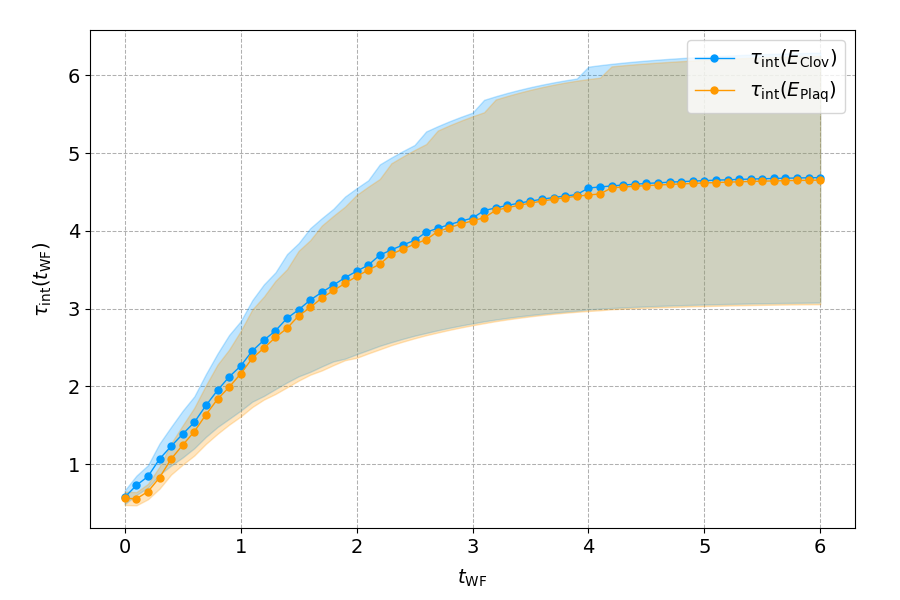

In [9]:
tau_EClov = np.array([np.squeeze(obsEClov[i].tauint()['Ensemble A'], axis=1) for i in range(Nwf)])
tau_EPlaq = np.array([np.squeeze(obsEPlaq[i].tauint()['Ensemble A'], axis=1) for i in range(Nwf)])
tau_Q     = np.array([np.squeeze(obsQ[i].tauint()['Ensemble A'],     axis=1) for i in range(Nwf)])
tau_Q2    = np.array([np.squeeze(obsQ2[i].tauint()['Ensemble A'],    axis=1) for i in range(Nwf)])


fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.10)
plt.subplots_adjust(right  = 0.95)

fsize = 14

ax.set_ylabel(r"$\tau_\mathrm{int}(t_\mathrm{WF})$", labelpad=10, rotation=90, fontsize=fsize)
ax.set_xlabel(r'$t_\mathrm{WF}$', labelpad=8, fontsize=fsize)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.xlim([-1, 50.5])
#plt.ylim([1e-2, 1e1])
ax.grid(linestyle = '--', linewidth = 0.75)

std = 1.0
ax.plot(t_WF, tau_EClov[:,0], label=r'$\tau_\mathrm{int}(E_\mathrm{Clov})$', linestyle='-', marker='o' , markersize=5.0, color='#0099ff', linewidth=1.0)
ax.fill_between(t_WF, tau_EClov[:,0] + std * tau_EClov[:,1], tau_EClov[:,0] - std * tau_EClov[:,1], alpha=.25, color='#0099ff')
ax.plot(t_WF, tau_EPlaq[:,0], label=r'$\tau_\mathrm{int}(E_\mathrm{Plaq})$', linestyle='-', marker='o' , markersize=5.0, color='#ff9900', linewidth=1.0)
ax.fill_between(t_WF, tau_EPlaq[:,0] + std * tau_EPlaq[:,1], tau_EPlaq[:,0] - std * tau_EPlaq[:,1], alpha=.25, color='#ff9900')
# ax.plot(t_WF, tau_Q[:,0], label=r'$\tau_\mathrm{int}(Q)$', linestyle='-', marker='o' , markersize=5.0, color='#a151bf', linewidth=1.0)
# ax.fill_between(t_WF, tau_Q[:,0] + std * tau_Q[:,1], tau_Q[:,0] - std * tau_Q[:,1], alpha=.25, color='#a151bf')
# ax.plot(t_WF, tau_Q2[:,0], label=r'$\tau_\mathrm{int}(Q^2)$', linestyle='-', marker='o' , markersize=5.0, color='#d13e27', linewidth=1.0)
# ax.fill_between(t_WF, tau_Q2[:,0] + std * tau_Q2[:,1], tau_Q2[:,0] - std * tau_Q2[:,1], alpha=.25, color='#d13e27')

ax.legend(loc='best', fontsize=fsize)
#plt.savefig("tau_int.pdf")

In [10]:
### Compute t^2<E> for each t_WF ###
obs_t2EClov = (t_WF[1:]**2) * obsEClov[1:]
obs_t2EPlaq = (t_WF[1:]**2) * obsEPlaq[1:]
print("\n")
print(*(f"(t = {t_WF[i+1]:.2f}) :   t^2 <E_Clov> = {obs_t2EClov[i]}               t^2 <E_Plaq> = {obs_t2EPlaq[i]}\n" for i in range(WF_evol // WF_step)), sep='')



(t = 0.10) :   t^2 <E_Clov> = 0.01373028(33)
               t^2 <E_Plaq> = 0.0605376(11)

(t = 0.20) :   t^2 <E_Clov> = 0.0343945(15)
               t^2 <E_Plaq> = 0.1047903(33)

(t = 0.30) :   t^2 <E_Clov> = 0.0493327(35)
               t^2 <E_Plaq> = 0.1151729(60)

(t = 0.40) :   t^2 <E_Clov> = 0.0593484(59)
               t^2 <E_Plaq> = 0.1141790(91)

(t = 0.50) :   t^2 <E_Clov> = 0.0666825(89)
               t^2 <E_Plaq> = 0.111637(12)

(t = 0.60) :   t^2 <E_Clov> = 0.072653(12)
               t^2 <E_Plaq> = 0.110183(16)

(t = 0.70) :   t^2 <E_Clov> = 0.077904(17)
               t^2 <E_Plaq> = 0.110115(21)

(t = 0.80) :   t^2 <E_Clov> = 0.082751(22)
               t^2 <E_Plaq> = 0.111167(27)

(t = 0.90) :   t^2 <E_Clov> = 0.087353(28)
               t^2 <E_Plaq> = 0.113026(32)

(t = 1.00) :   t^2 <E_Clov> = 0.091799(34)
               t^2 <E_Plaq> = 0.115449(39)

(t = 1.10) :   t^2 <E_Clov> = 0.096142(41)
               t^2 <E_Plaq> = 0.118265(47)

(t = 1.20) :   t^2 <E_Clov> = 0

In [11]:
### Calculation of t_0 for both E_Clov and E_Plaq ###
eps = 0.01

x, dx = obs_t2EClov.error()
idx_x = np.squeeze(np.where((x < 0.3 + eps) & (x > 0.3 - eps)), axis=0)
print(f"\nE_Clov  :")
print(f"                  E_Clov  =  {x[idx_x]},") 
print(f"                  t_WF    =  {t_WF[idx_x+1]},\n") # recall t_WF starts from 0.0, whose corresponding value is not neither in obs_t2EClov nor in obs_t2EPlaq.
interp_Clov = pyobs.interpolate(t_WF[idx_x+1], obs_t2EClov[idx_x])
obs_t0EClov = interp_Clov.solve(0.3, bracket=[t_WF[(idx_x+1)[0]], t_WF[(idx_x+1)[-1]]])
print(f"                  interpolation  --->  t0 = {obs_t0EClov}")
t0_EClov, dt0_EClov = np.squeeze(obs_t0EClov.error(), axis=1)

y, dy = obs_t2EPlaq.error()
idx_y = np.squeeze(np.where((y < 0.3 + eps) & (y > 0.3 - eps)), axis=0)
print(f"E_Plaq  :")
print(f"                  E_Plaq  =  {y[idx_y]},") 
print(f"                  t_WF    =  {t_WF[idx_y+1]},\n")
interp_Plaq = pyobs.interpolate(t_WF[idx_y+1], obs_t2EPlaq[idx_y])
obs_t0EPlaq = interp_Plaq.solve(0.3, bracket=[t_WF[(idx_y+1)[0]], t_WF[(idx_y+1)[-1]]])
print(f"                  interpolation  --->  t0 = {obs_t0EPlaq}")
t0_EPlaq, dt0_EPlaq = np.squeeze(obs_t0EPlaq.error(), axis=1)


E_Clov  :
                  E_Clov  =  [0.29349825 0.29872856 0.30398884 0.30927891],
                  t_WF    =  [5.4 5.5 5.6 5.7],

                  interpolation  --->  t0 = 5.524(16)

E_Plaq  :
                  E_Plaq  =  [0.29203932 0.29733299 0.30266088 0.30802273],
                  t_WF    =  [5.  5.1 5.2 5.3],

                  interpolation  --->  t0 = 5.150(15)



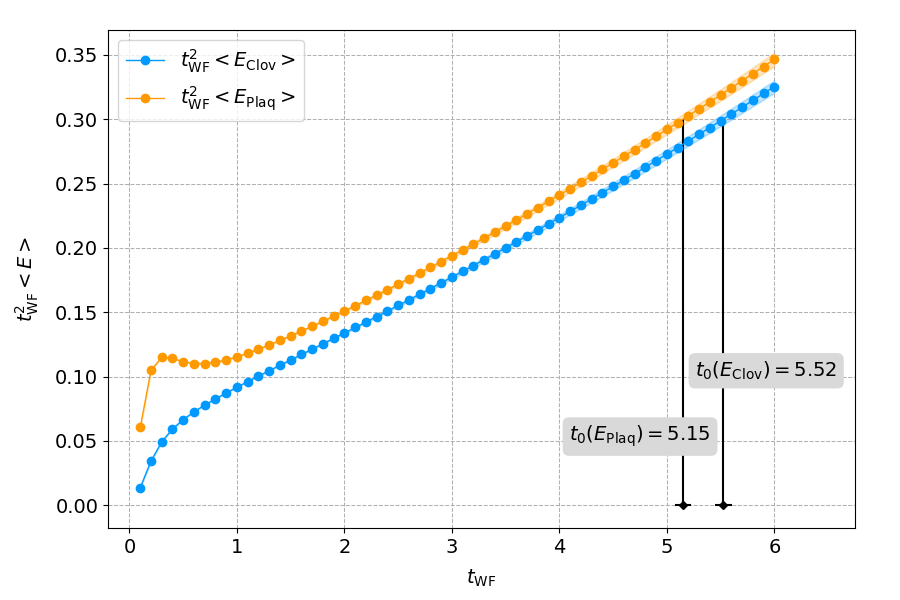

In [12]:
t2EClov = np.array([np.squeeze(obs_t2EClov[i].error(), axis=1) for i in range(WF_evol // WF_step)])
t2EPlaq = np.array([np.squeeze(obs_t2EPlaq[i].error(), axis=1) for i in range(WF_evol // WF_step)])

fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.12)
plt.subplots_adjust(right  = 0.95)

fsize = 14
std = 5.0
box = dict(boxstyle="round", color='#d9d9d9')

ax.set_ylabel(r"$t_\mathrm{WF}^2 <E>$", labelpad=10, rotation=90, fontsize=fsize)
ax.set_xlabel(r'$t_\mathrm{WF}$', labelpad=8, fontsize=fsize)

ax.vlines(x = t0_EClov, ymin = 0, ymax = 0.3, colors = 'black', linewidth=1.5)
#ax.scatter(t0_EClov, 0.0, color='black', marker='D', s=12.5)
ax.errorbar(t0_EClov, 0.0, xerr=std*dt0_EClov, color='black', marker='D', markersize=4)
ax.annotate(rf"$t_0(E_\mathrm{{Clov}}) = {t0_EClov:.2f}$", (t0_EClov, 0.10), xytext=(t0_EClov+0.4, 0.10), ha='center', bbox=box, fontsize=fsize)
ax.vlines(x = t0_EPlaq, ymin = 0, ymax = 0.3, colors = 'black', linewidth=1.5)
#ax.scatter(t0_EPlaq, 0.0, color='black', marker='D', s=12.5)
ax.errorbar(t0_EPlaq, 0.0, xerr=std*dt0_EPlaq, color='black', marker='D', markersize=4)
ax.annotate(rf"$t_0(E_\mathrm{{Plaq}}) = {t0_EPlaq:.2f}$", (t0_EPlaq, 0.10), xytext=(t0_EPlaq-0.4, 0.05), ha='center', bbox=box, fontsize=fsize)


plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.xlim([-0.2, 6.75])
#plt.ylim([1e-2, 1e1])
ax.grid(linestyle = '--', linewidth = 0.75)

ax.plot(t_WF[1:], t2EClov[:,0], label=r'$t_\mathrm{WF}^2 <E_\mathrm{Clov}>$', linestyle='-', marker='o' , markersize=6.0, color='#0099ff', linewidth=1.0)
ax.fill_between(t_WF[1:], t2EClov[:,0] + std * t2EClov[:,1], t2EClov[:,0] - std * t2EClov[:,1], alpha=.25, color='#0099ff')
ax.plot(t_WF[1:], t2EPlaq[:,0], label=r'$t_\mathrm{WF}^2 <E_\mathrm{Plaq}>$', linestyle='-', marker='o' , markersize=6.0, color='#ff9900', linewidth=1.0)
ax.fill_between(t_WF[1:], t2EPlaq[:,0] + std * t2EPlaq[:,1], t2EPlaq[:,0] - std * t2EPlaq[:,1], alpha=.25, color='#ff9900')

ax.legend(loc='best', fontsize=fsize)
#plt.savefig('t0E.pdf')

In [18]:
obsEClov[0].delta.keys()

dict_keys(['Ensemble A:0', 'Ensemble A:1'])

In [16]:
### Compute autocorrelation functions for each <E_Clov>_t and <E_Plaq>_t ###
gammaEClov = []
gammaEPlaq = []
gammaQ     = []
gammaQ2    = []
if (obsEClov.shape[0] == Nwf) and (obsEPlaq.shape[0] == Nwf) \
    and (obsQ.shape[0] == Nwf) and (obsQ2.shape[0] == Nwf):
    for i in range(Nwf): 
        norm, gamma = obsEClov[i].delta['Ensemble A:0'].gamma(Ncnfg, 0) # t0.delta.gamma
        gamma = gamma / norm
        gammaEClov.append(gamma)
        norm, gamma = obsEPlaq[i].delta['Ensemble A:0'].gamma(Ncnfg, 0)
        gamma = gamma / norm
        gammaEPlaq.append(gamma)
        norm, gamma = obsQ[i].delta['Ensemble A:0'].gamma(Ncnfg, 0)
        gamma = gamma / norm
        gammaQ.append(gamma)
        norm, gamma = obsQ2[i].delta['Ensemble A:0'].gamma(Ncnfg, 0)
        gamma = gamma / norm
        gammaQ2.append(gamma)
else:
    print(f"Check observables shapes !")

norm, gamma_t0EClov = obs_t0EClov.delta['Ensemble A:0'].gamma(Ncnfg, 0)
gamma_t0EClov = gamma_t0EClov / norm 

norm, gamma_t0EPlaq = obs_t0EPlaq.delta['Ensemble A:0'].gamma(Ncnfg, 0)
gamma_t0EPlaq = gamma_t0EPlaq / norm 

gammaEClov = np.array(gammaEClov)
gammaEPlaq = np.array(gammaEPlaq)
gammaQ     = np.array(gammaQ)
gammaQ2    = np.array(gammaQ2)

NameError: name 'Ncnfg' is not defined

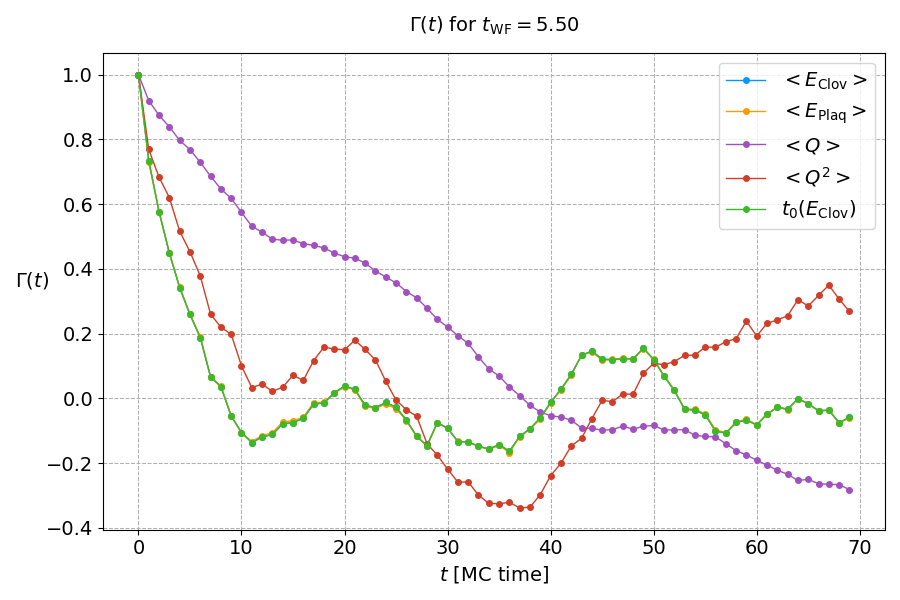

In [14]:
fig, ax = plt.subplots(figsize=(9, 6))

plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.05)
plt.subplots_adjust(left   = 0.05)
plt.subplots_adjust(right  = 0.95)
fsize = 14

tmax = Ncnfg // 4
t = 5.50
i = int(t / (eps_WF * WF_step)) 

plt.title(rf'$\Gamma(t)$ for $t_\mathrm{{WF}}={t:.2f}$', pad=15, fontsize=fsize)

ax.plot(np.arange(tmax), gammaEClov[i,:tmax]/gammaEClov[i,0], color='#0099ff', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=4.0,   label=rf'$<E_\mathrm{{Clov}}>$')
ax.plot(np.arange(tmax), gammaEPlaq[i,:tmax]/gammaEPlaq[i,0], color='#ff9900', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=4.0,   label=rf'$<E_\mathrm{{Plaq}}>$')
ax.plot(np.arange(tmax), gammaQ[i,:tmax]/gammaQ[i,0], color='#a151bf', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=4.0,   label=rf'$<Q>$')
ax.plot(np.arange(tmax), gammaQ2[i,:tmax]/gammaQ2[i,0], color='#d13e27', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=4.0,   label=rf'$<Q^2>$')
ax.plot(np.arange(tmax), gamma_t0EClov[:tmax]/gamma_t0EClov[0], color='#3cba25', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=4.0,   label=rf'$t_0(E_\mathrm{{Clov}})$')
ax.set_xlabel(r'$t$ [MC time]', fontsize=fsize)
ax.set_ylabel(r'$\Gamma(t)$', rotation=0, labelpad=10, fontsize=fsize)
ax.legend(loc='best', fontsize=fsize)


plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
#plt.xlim([-0.1, 10])
#plt.ylim([1e-2, 1e1])
#ax.set_yscale('log', base=10)
#ax.set_xscale('log', base=10)
ax.grid(linestyle = '--', linewidth = 0.75)

fig.tight_layout()
